In [4]:
import ROOT
from ROOT import TFile, TTree, TH1F, TCanvas, TAxis, TLegend, THStack
import copy
import math
ROOT.gStyle.SetOptStat(0)
ROOT.disableJSVis()

In [5]:
def getRangeY(hist):
    global y_upper
    max_entry = hist.GetMaximum()
    if max_entry > y_upper:
        y_upper = max_entry * 1.1
def setHistOpt(hist, lcolor, lstyle):
    hist.SetLineWidth(2)
    hist.SetLineColor(lcolor)
    hist.SetLineStyle(lstyle)
def plot(h_plot, canvas, leg, xtitle, dopt, hlabel):
    global y_upper
    h_plot.Draw(dopt)
    h_plot.GetXaxis().SetTitle(xtitle)
    h_plot.GetXaxis().SetTitleOffset(1.2)
    h_plot.GetYaxis().SetTitle("Events")
    h_plot.SetMinimum(0.5)
    print(y_upper)
    h_plot.SetMaximum(y_upper)
    leg.AddEntry(h_plot,hlabel)

In [ ]:
# stacking QCD
variable2use = {}
variable2use["m_jj"] = {"title": "m_{jj} [GeV]", "binning": 100, "lb": 0, "hb": 12000}
# variable2use["dijet_eta"] = {"title": "#eta_{jj}", "binning": 100, "lb": -3, "hb": 3}
# variable2use["dR_jj"] = {"title": "#Delta R_{jj}", "binning": 100, "lb": 0, "hb": 6}
# variable2use["dEta_jj"] = {"title": "#Delta #eta_{jj}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["dPhi_jj"] = {"title": "#Delta #phi_{jj}", "binning": 100, "lb": 0, "hb": 3.2}
# variable2use["dR_j0j2"] = {"title": "#Delta R_{j0j2}", "binning": 100, "lb": 0, "hb": 6}
# variable2use["dEta_j0j2"] = {"title": "#Delta #eta_{j0j2}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["dPhi_j0j2"] = {"title": "#Delta #phi_{j0j2}", "binning": 100, "lb": 0, "hb": 3.2}
# variable2use["dR_j1j2"] = {"title": "#Delta R_{j1j2}", "binning": 100, "lb": 0, "hb": 6}
# variable2use["dEta_j1j2"] = {"title": "#Delta #eta_{j1j2}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["dPhi_j1j2"] = {"title": "#Delta #phi_{j1j2}", "binning": 100, "lb": 0, "hb": 3.2}
# variable2use["jet_eta_0"] = {"title": "#eta_{j0}", "binning": 100, "lb": -3, "hb": 3}
# variable2use["jet_eta_1"] = {"title": "#eta_{j1}", "binning": 100, "lb": -3, "hb": 3}
# variable2use["jet_eta_2"] = {"title": "#eta_{j2}", "binning": 100, "lb": -3, "hb": 3}
# variable2use["jet_ptoverm_0"] = {"title": "p^{j0}_{T}/m_{jj}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["jet_ptoverm_1"] = {"title": "p^{j1}_{T}/m_{jj}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["jet_ptoverm_2"] = {"title": "p^{j2}_{T}/m_{jj}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["dR_jj_j"] = {"title": "#Delta R_{jj-j}", "binning": 100, "lb": 0, "hb": 6}
# variable2use["dEta_jj_j"] = {"title": "#Delta #eta_{jj-j}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["dPhi_jj_j"] = {"title": "#Delta #phi_{jj-j}", "binning": 100, "lb": 0, "hb": 3.2}
# variable2use["jet_ptoverM_0"] = {"title": "p^{j0}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["jet_ptoverM_1"] = {"title": "p^{j1}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["jet_ptoverM_2"] = {"title": "p^{j2}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 1}
# variable2use["dijet_ptoverM"] = {"title": "p^{jj}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 1}
variable2use["M_jjj"] = {"title": "M_{jjj}", "binning": 100, "lb": 0, "hb": 15000}

hist_dic = {}
QCD_list = ["QCD_Pt_300to470", "QCD_Pt_470to600","QCD_Pt_600to800","QCD_Pt_800to1000","QCD_Pt_1000to1400","QCD_Pt_1400to1800", "QCD_Pt_1800to2400",
               "QCD_Pt_2400to3200","QCD_Pt_3200toInf"]
QCD_list.reverse()

file_list = []
for i, sample in enumerate(QCD_list):
    file = TFile.Open(f"/home/xyan13/Trijet/TrijetAna/TrijetAna/benchmark_selection/samples_100pb_skimmed/{sample}_filtered_100pbinv.root")
    file_list.append(file)
    tree = file.Get("Events")
    hist_dic[sample] = {}
    for var, title in variable2use.items():
        hist_dic[sample][var] = TH1F(f"{sample}_{var}", title["title"], title["binning"], title["lb"], title["hb"])
        print(f"Processing: {sample}, {var}")
        for ievt in range(tree.GetEntries()):
            tree.GetEntry(ievt)
            hist_dic[sample][var].Fill(getattr(tree, var))
        print(hist_dic[sample][var].GetEntries(), hist_dic[sample][var].GetMean())
        setHistOpt(hist_dic[sample][var], i+2, 1)

hist_stack = {}
for var in variable2use.keys():
    hist_stack[var] = THStack(var,var)
    for sample in sample_list:
         hist_stack[var].Add(hist_dic[sample][var])

In [16]:
variable2use = {}
variable2use["m_jj"] = {"title": "m_{jj} [GeV]", "binning": 100, "lb": 0, "hb": 8000}
variable2use["dijet_eta"] = {"title": "#eta_{jj}", "binning": 100, "lb": -3, "hb": 3}
variable2use["dR_jj"] = {"title": "#Delta R_{jj}", "binning": 100, "lb": 0, "hb": 6}
variable2use["dEta_jj"] = {"title": "#Delta #eta_{jj}", "binning": 100, "lb": 0, "hb": 3}
variable2use["dPhi_jj"] = {"title": "#Delta #phi_{jj}", "binning": 100, "lb": 0, "hb": 3.2}
# variable2use["dR_j0j2"] = {"title": "#Delta R_{j0j2}", "binning": 100, "lb": 0, "hb": 6}
# variable2use["dEta_j0j2"] = {"title": "#Delta #eta_{j0j2}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["dPhi_j0j2"] = {"title": "#Delta #phi_{j0j2}", "binning": 100, "lb": 0, "hb": 3.2}
# variable2use["dR_j1j2"] = {"title": "#Delta R_{j1j2}", "binning": 100, "lb": 0, "hb": 6}
# variable2use["dEta_j1j2"] = {"title": "#Delta #eta_{j1j2}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["dPhi_j1j2"] = {"title": "#Delta #phi_{j1j2}", "binning": 100, "lb": 0, "hb": 3.2}
variable2use["jet_eta_0"] = {"title": "#eta_{j0}", "binning": 100, "lb": -3, "hb": 3}
variable2use["jet_eta_1"] = {"title": "#eta_{j1}", "binning": 100, "lb": -3, "hb": 3}
variable2use["jet_eta_2"] = {"title": "#eta_{j2}", "binning": 100, "lb": -3, "hb": 3}
variable2use["jet_ptoverm_0"] = {"title": "p^{j0}_{T}/m_{jj}", "binning": 100, "lb": 0, "hb": 3}
variable2use["jet_ptoverm_1"] = {"title": "p^{j1}_{T}/m_{jj}", "binning": 100, "lb": 0, "hb": 3}
variable2use["jet_ptoverm_2"] = {"title": "p^{j2}_{T}/m_{jj}", "binning": 100, "lb": 0, "hb": 3}
variable2use["dR_jj_j"] = {"title": "#Delta R_{jj-j}", "binning": 100, "lb": 0, "hb": 6}
# variable2use["dEta_jj_j"] = {"title": "#Delta #eta_{jj-j}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["dPhi_jj_j"] = {"title": "#Delta #phi_{jj-j}", "binning": 100, "lb": 0, "hb": 3.2}
variable2use["jet_ptoverM_0"] = {"title": "p^{j0}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 3}
variable2use["jet_ptoverM_1"] = {"title": "p^{j1}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 3}
variable2use["jet_ptoverM_2"] = {"title": "p^{j2}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 1}
variable2use["dijet_ptoverM"] = {"title": "p^{jj}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 1}
variable2use["M_jjj"] = {"title": "M_{jjj}", "binning": 100, "lb": 0, "hb": 10000}

hist_dic = {}
file_list = []
QCD_list = ["QCD"]
Sig_list = ["Res1ToRes2GluTo3Glu_M1-3000_R-0p3","Res1ToRes2GluTo3Glu_M1-5000_R-0p3","Res1ToRes2GluTo3Glu_M1-7000_R-0p3"]

for i, sample in enumerate(QCD_list):
    file = TFile.Open(f"/home/xyan13/Trijet/TrijetAna/TrijetAna/benchmark_selection/samples_100pb_skimmed/{sample}_filtered_100pbinv.root")
    file_list.append(file)
    tree = file.Get("Events")
    hist_dic[sample] = {}
    for var, title in variable2use.items():
        hist_dic[sample][var] = TH1F(f"{sample}_{var}", title["title"], title["binning"], title["lb"], title["hb"])
        print(f"Processing: {sample}, {var}")
        for ievt in range(tree.GetEntries()):
            tree.GetEntry(ievt)
            if(abs(tree.jet_eta_0) > 2): continue
            if(abs(tree.jet_eta_1) > 2): continue
            if(abs(tree.jet_eta_2) > 2): continue
            if(tree.dEta_jj > 1.7): continue
            if(tree.dijet_eta > 1.3): continue
            if(tree.dR_jj > 2.2): continue
            hist_dic[sample][var].Fill(getattr(tree, var))
        print(hist_dic[sample][var].GetEntries(), hist_dic[sample][var].GetMean())
        hist_dic[sample][var].Scale(1./hist_dic[sample][var].GetEntries())
        setHistOpt(hist_dic[sample][var], i+1, 1)
        
for i, sample in enumerate(Sig_list):
    file = TFile.Open(f"/home/xyan13/Trijet/TrijetAna/TrijetAna/benchmark_selection/samples_100pb_skimmed/{sample}_filtered_match_3_0.root")
    file_list.append(file)
    tree = file.Get("Events")
    hist_dic[sample] = {}
    for var, title in variable2use.items():
        hist_dic[sample][var] = TH1F(f"{sample}_{var}", title["title"], title["binning"], title["lb"], title["hb"])
        print(f"Processing: {sample}, {var}")
        for ievt in range(tree.GetEntries()):
            tree.GetEntry(ievt)
            if(abs(tree.jet_eta_0) > 2): continue
            if(abs(tree.jet_eta_1) > 2): continue
            if(abs(tree.jet_eta_2) > 2): continue
            if(tree.dEta_jj > 1.7): continue
            if(tree.dijet_eta > 1.3): continue
            if(tree.dR_jj > 2.2): continue
            hist_dic[sample][var].Fill(getattr(tree, var))
        hist_dic[sample][var].Scale(1./hist_dic[sample][var].GetEntries())
        setHistOpt(hist_dic[sample][var], i+2, 1)

hist_stack = {}
for var in variable2use.keys():
    hist_stack[var] = THStack(var,var)
    for sample in QCD_list+Sig_list:
         hist_stack[var].Add(hist_dic[sample][var])

Processing: QCD, m_jj
33987.0 345.59705709874424
Processing: QCD, dijet_eta
33987.0 -0.16487441241281325
Processing: QCD, dR_jj
33987.0 1.2051630315858646
Processing: QCD, dEta_jj
33987.0 0.6910422635872615
Processing: QCD, dPhi_jj
33987.0 0.8380534656093305
Processing: QCD, jet_eta_0
33987.0 -0.15139798068077245
Processing: QCD, jet_eta_1
33987.0 -0.12572705724125918
Processing: QCD, jet_eta_2
33987.0 -0.011759202024280213
Processing: QCD, jet_ptoverm_0
33987.0 1.3664529346236758
Processing: QCD, jet_ptoverm_1
33987.0 0.7035222298548397
Processing: QCD, jet_ptoverm_2
33987.0 1.558713093226262
Processing: QCD, dR_jj_j
33987.0 3.2389558517423778
Processing: QCD, jet_ptoverM_0
33987.0 0.30097209594635865
Processing: QCD, jet_ptoverM_1
33987.0 0.14976165011759937
Processing: QCD, jet_ptoverM_2
33987.0 0.39411644361314885
Processing: QCD, dijet_ptoverM
33987.0 0.4010258285083974
Processing: QCD, M_jjj
33987.0 1414.8788009909788
Processing: Res1ToRes2GluTo3Glu_M1-3000_R-0p3, m_jj
Processing

m_jj 0.39486387073993684
0.39486387073993684
dijet_eta 0.03549078293144703
0.03549078293144703
dR_jj 0.1116825744509697
0.1116825744509697
dEta_jj 0.03414540942758322
0.03414540942758322
dPhi_jj 0.03758770674467087
0.03758770674467087
jet_eta_0 0.04206752479076386
0.04206752479076386
jet_eta_1 0.03280241470783949
0.03280241470783949
jet_eta_2 0.03615177758038044
0.03615177758038044
jet_ptoverm_0 0.05310131721198559
0.05310131721198559
jet_ptoverm_1 0.07015857622027398
0.07015857622027398
jet_ptoverm_2 0.04175554141402245
0.04175554141402245
dR_jj_j 0.22490878105163575
0.22490878105163575
jet_ptoverM_0 0.16270044147968293
0.16270044147968293
jet_ptoverM_1 0.22422690391540528
0.22422690391540528
jet_ptoverM_2 0.07455795407295228
0.07455795407295228
dijet_ptoverM 0.08652119338512422
0.08652119338512422
M_jjj 0.18076059669256211
0.18076059669256211


Warning in <TCanvas::Constructor>: Deleting canvas with same name: m_jj
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dijet_eta
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dR_jj
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dEta_jj
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dPhi_jj
Warning in <TCanvas::Constructor>: Deleting canvas with same name: jet_eta_0
Warning in <TCanvas::Constructor>: Deleting canvas with same name: jet_eta_1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: jet_eta_2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: jet_ptoverm_0
Warning in <TCanvas::Constructor>: Deleting canvas with same name: jet_ptoverm_1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: jet_ptoverm_2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: dR_jj_j
Warning in <TCanvas::Constructor>: Deleting canvas with same name: jet_ptoverM_

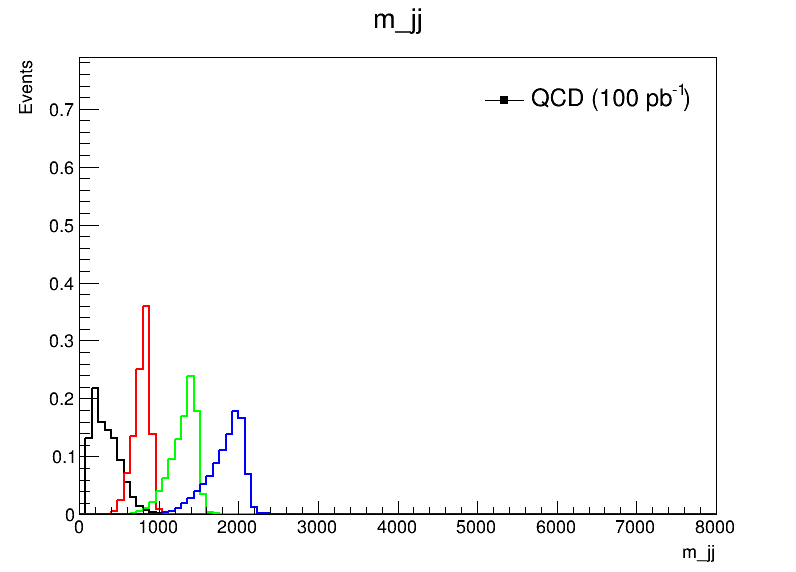

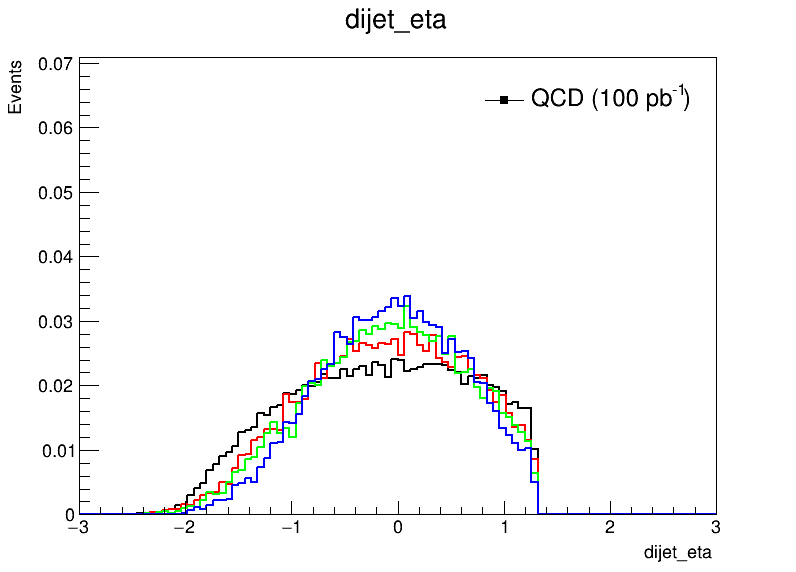

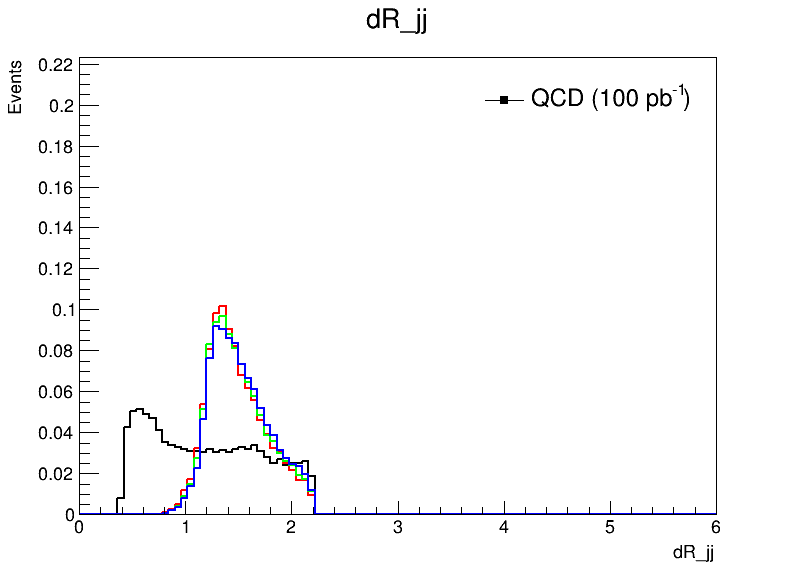

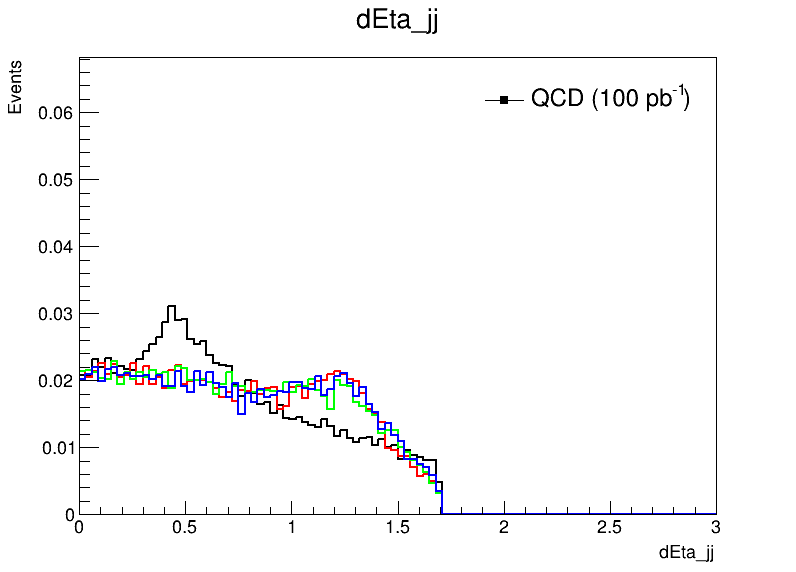

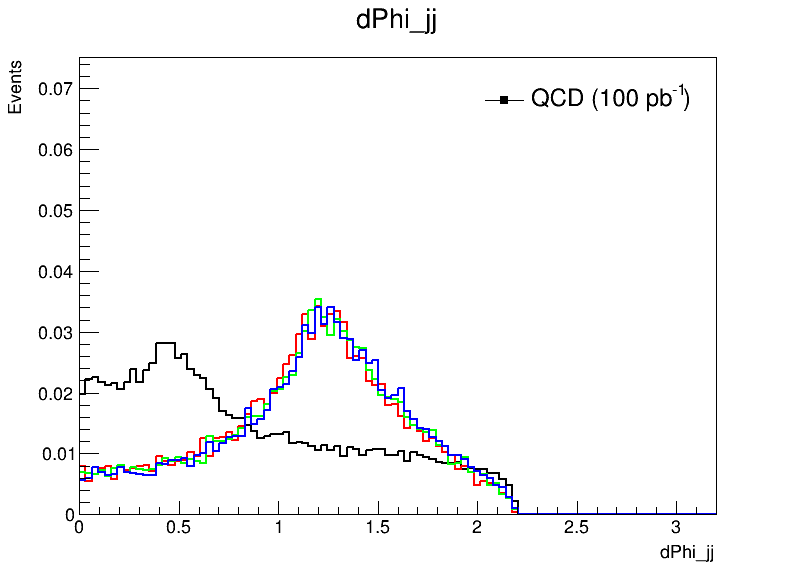

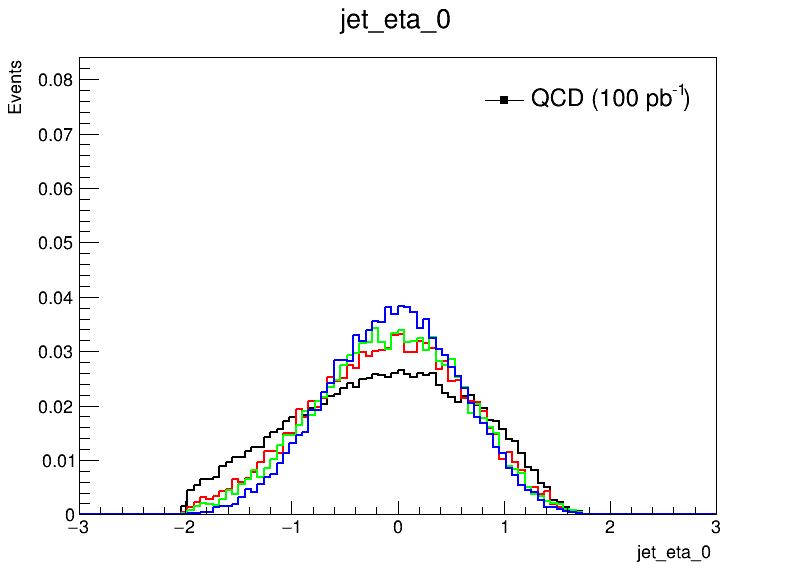

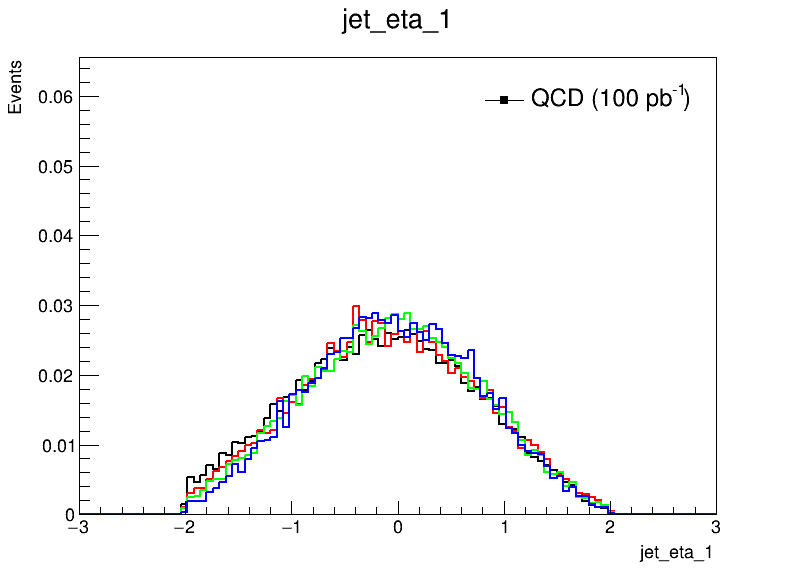

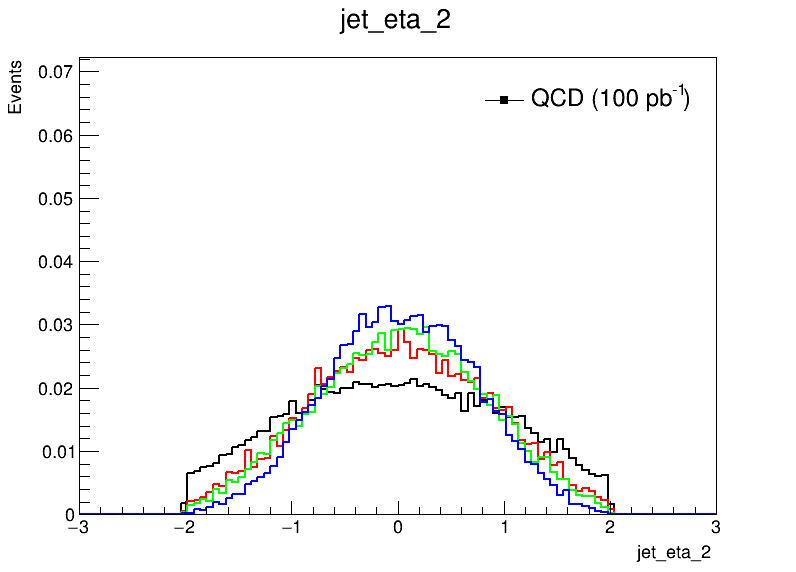

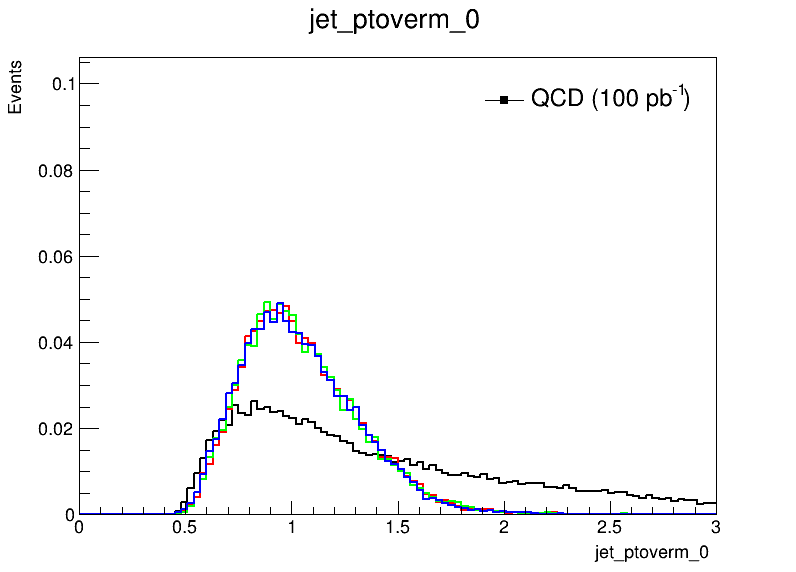

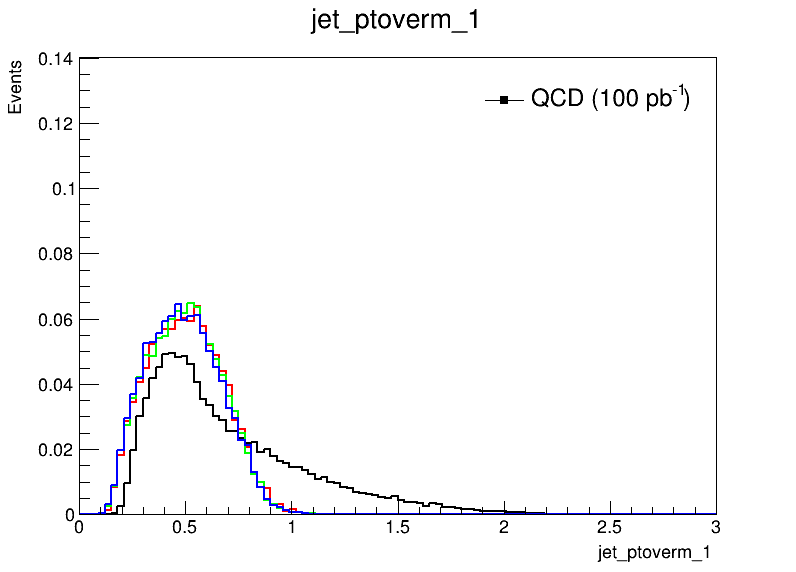

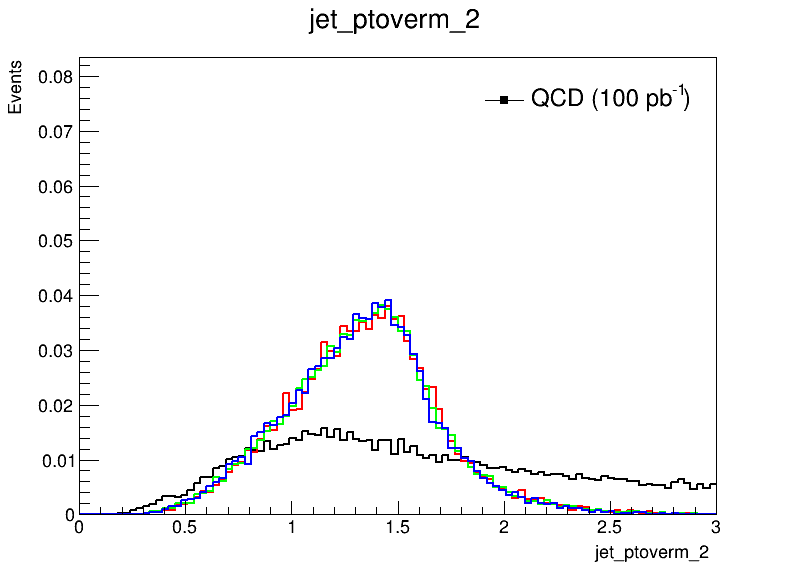

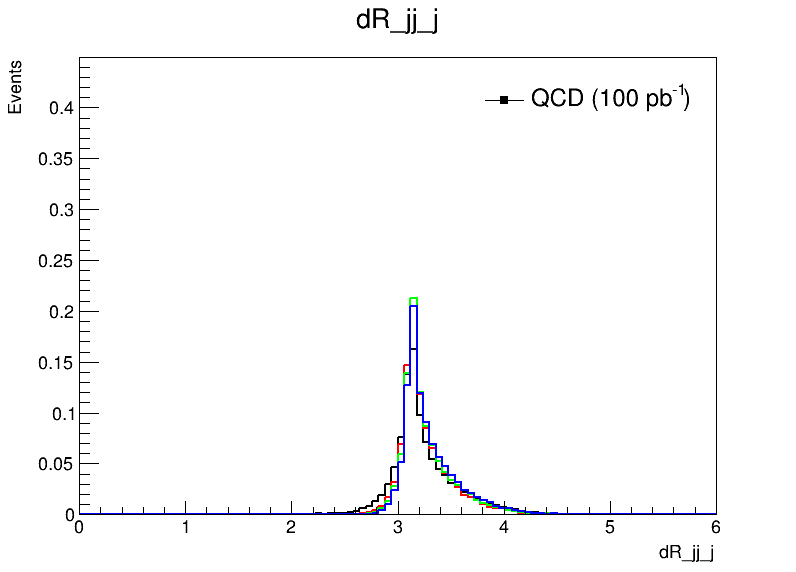

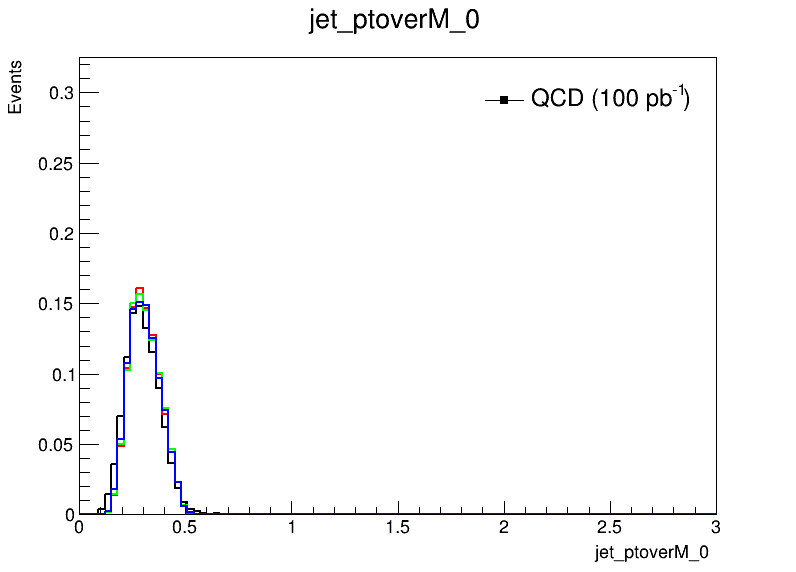

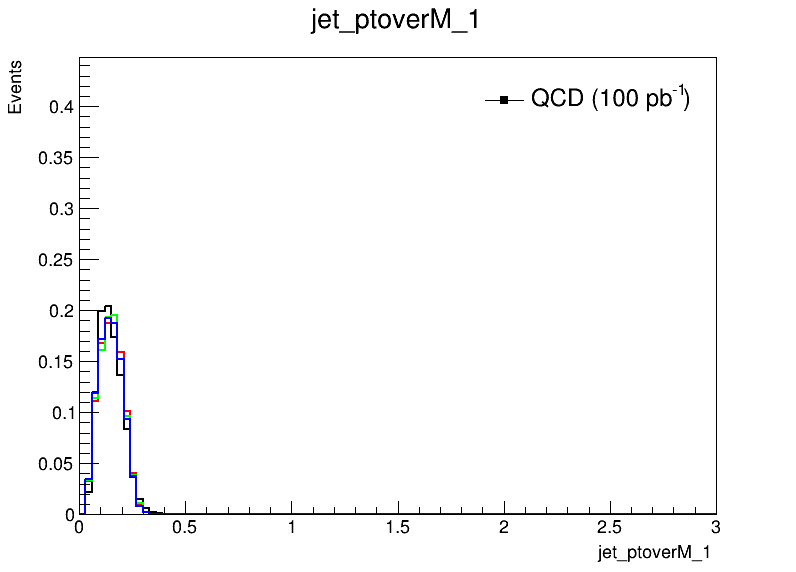

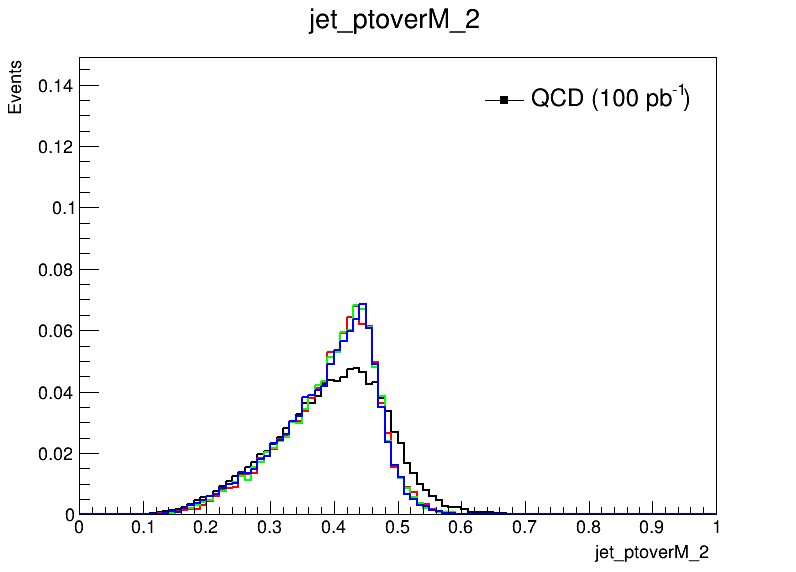

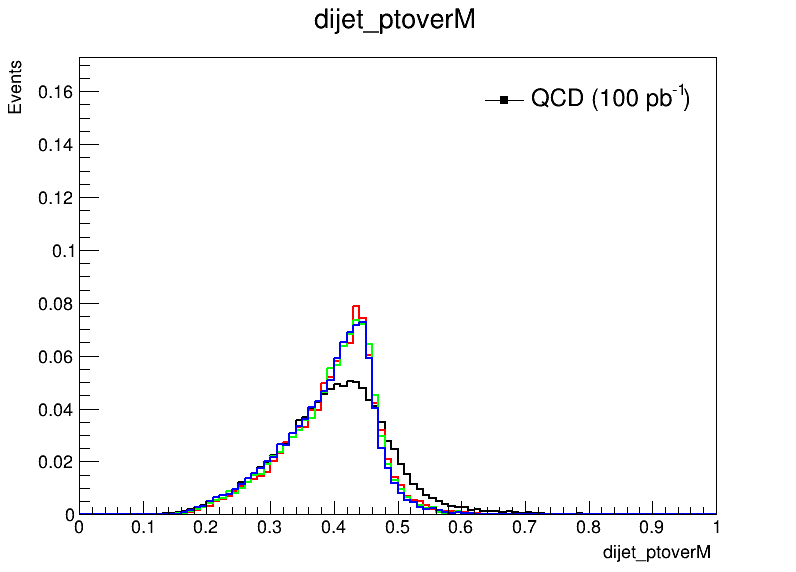

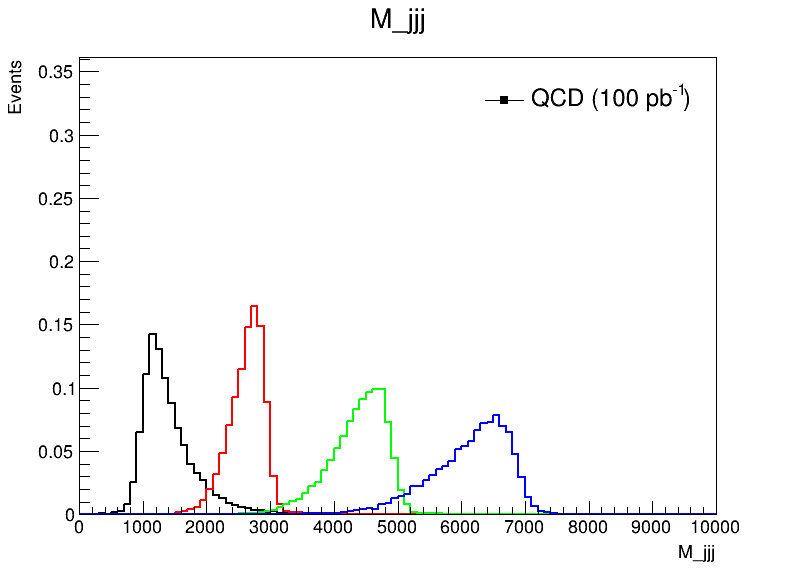

In [17]:
nvar = len(hist_dic.keys())
nrow = math.ceil(nvar/3)
plot_list = []
leg_list = []
plot_name_list = []
for variable, hist in hist_stack.items():
    y_upper = 0
    for sample in hist_dic.keys():
        histo = hist_dic[sample][variable]
        getRangeY(histo)
    c = TCanvas(variable,"",800,600)
    leg = TLegend(0.6,0.8,0.87,0.85)
    leg.SetBorderSize(0)
    title = hist.GetTitle()
    print(title, y_upper)
    plot(h_plot=hist, canvas=c, leg=leg, xtitle=title, dopt="HISTNOSTACK", hlabel="QCD (100 pb^{-1})")
    plot_list.append(c)
    leg_list.append(leg)
    plot_name_list.append(hist.GetName())
for i in range(0,len(plot_list)):
    plot_list[i].cd()
#     plot_list[i].SetLogy()
    leg_list[i].Draw()
    plot_list[i].Draw()
    plot_list[i].Print(f"{plot_name_list[i]}.png")